<a href="https://colab.research.google.com/github/ShindeAnjali2k6/AIML-25/blob/main/2303A54037_11_48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [11]:

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

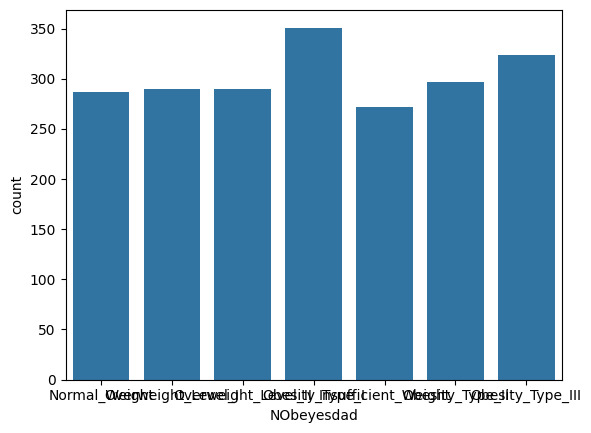

In [12]:

print(df.head())

print(df.isnull().sum())

print(df.describe())

print(df['Gender'].value_counts())

print(df.columns)

try:
    print(df['Family_History_With_Overweight'].value_counts())
except KeyError:
    print("Column 'Family_History_With_Overweight' not found in the DataFrame.")


sns.countplot(x='NObeyesdad', data=df)
plt.show()

In [18]:

print(df.columns)

column_name = 'family_history_with_overweight'

df['Gender'] = le.fit_transform(df['Gender'])
df[column_name] = le.fit_transform(df[column_name])
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [20]:

le = LabelEncoder()

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(df.columns)

column_name = 'family_history_with_overweight'

categorical_cols = ['Gender', column_name, 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
    else:
        print(f"Column '{col}' not found in DataFrame.")

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Accuracy: 0.6548463356973995
Confusion Matrix:
 [[52  2  0  0  0  2  0]
 [17 26  4  1  1  6  7]
 [ 0  0 47  9  6  3 13]
 [ 0  0  3 49  0  0  6]
 [ 0  0  0  0 63  0  0]
 [ 1 14 11  0  0 21  9]
 [ 0  7 16  1  0  7 19]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:

print(df.groupby('NObeyesdad').size().sort_values(ascending=False).head(5))
print(df.groupby('Age').size().sort_values(ascending=False).head(1))
print(df[df['NObeyesdad'] == 'Obesity_Type_II'][['Weight']].max())
print(df[df['NObeyesdad'] == 'Obesity_Type_II'][['Weight']].min())

NObeyesdad
2    351
4    324
3    297
5    290
6    290
dtype: int64
Age
18.0    128
dtype: int64
Weight   NaN
dtype: float64
Weight   NaN
dtype: float64
